<a href="https://colab.research.google.com/github/tvelichkovt/TensorFlow/blob/master/TF_004_Shallow_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf -> "import"

In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print('TensorFlow ver is:', tf.__version__, '\nKeras ver is:', keras.__version__, '\nPandas ver is:', pd.__version__, '\nNumpy ver is:', np.__version__)

TensorFlow ver is: 2.2.0 
Keras ver is: 2.3.0-tf 
Pandas ver is: 1.0.5 
Numpy ver is: 1.18.5


In [19]:
from matplotlib import cm
from mpl_toolkits import mplot3d

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# tf -> "Shallow Neural network -> random seed for reproducibility"

In [20]:
seed = 7
np.random.seed(seed)

# tf -> "Shallow Neural network -> generate two sets of data"

In [21]:
X,y = make_moons(n_samples = 6000, noise = 0.08)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(6000, 2)
(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# tf -> "Shallow Neural network -> data visualization"

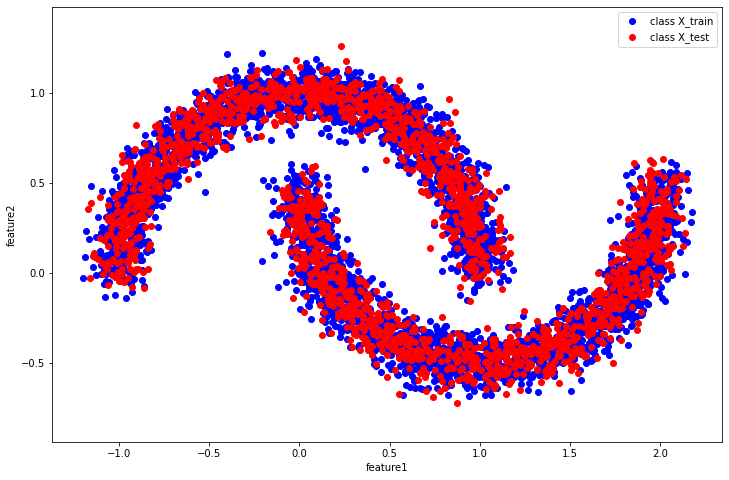

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

# tf -> "Shallow Neural network -> hyperparameters"

In [23]:
# Hyperparameters
training_epochs = 10 # Total number of training epochs
learning_rate = 0.01 # The learning rate
momentum = 0.9

# tf -> "Shallow Neural network -> creating a model"

In [24]:
# create a model
def create_model():
    model = tf.keras.Sequential()
    # Hidden layers
    model.add(tf.keras.layers.Dense(12, input_dim=2, activation='relu'))
    model.add(tf.keras.layers.Dense(6, activation='relu'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.SGD(learning_rate, momentum),
                metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


# tf -> "Shallow Neural network -> train the model"

In [25]:
results = model.fit(
    X_train, y_train.T,
    epochs= training_epochs,
    validation_data = (X_test, y_test.T),
    verbose = 0
)

# tf -> "Shallow Neural network -> evaluate the model to see the accuracy"

In [26]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0121, accuracy: 99.9254%
Evaluating on testing set...
loss=0.0113, accuracy: 99.9495%


# tf -> "Shallow Neural network -> summarize history for accuracy"

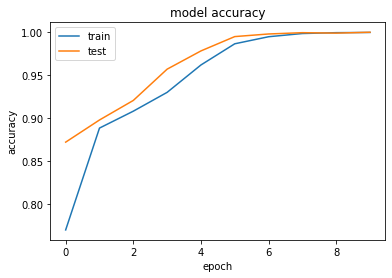

In [27]:
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

# tf -> "Shallow Neural network -> summarize history for loss"

Maximum Loss : 0.4797

Minimum Loss : 0.0140

Loss difference : 0.4657


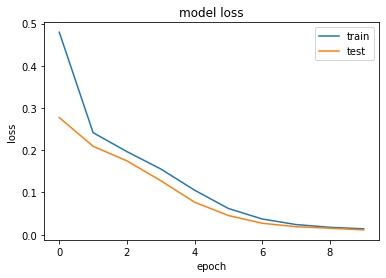

In [28]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# tf -> "Shallow Neural network -> visualization of the model predictions on our test set"

In [29]:
prediction_values = model.predict_classes(X_test)
print("Prediction values shape:", prediction_values.shape)

Prediction values shape: (1980, 1)


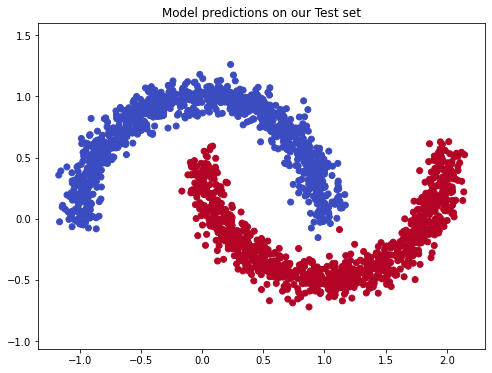

In [30]:
plt.figure(figsize =(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

Text(0.5, 1.0, 'Model predictions on our Test set')

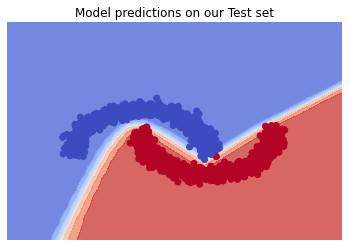

In [31]:
xx = np.linspace(-2, 3, 40)
yy = np.linspace(-2, 3, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 3])
axes.set_ylim([-2, 3])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')